In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
#Reading the dataset. The dataset was saved as csv since it was xls file and then loaded.

In [136]:
data= pd.read_csv(r'C:\Users\bini1\Downloads\iris.csv')

In [ ]:
#Checking the dataset.

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [138]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [139]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Doing the preprocessing works. Replacing the null values with the mean values

In [140]:
data= data.fillna(data.mean())

C:\Users\bini1\AppData\Local\Temp\ipykernel_5776\3047626818.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data= data.fillna(data.mean())


In [141]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#Defining the feature and label variables

In [142]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [143]:
x= data[['SL', 'SW', 'PL', 'PW']]
y=data[['Classification']]

In [144]:
x.shape

(150, 4)

In [145]:
y.shape

(150, 1)

In [ ]:
#Standardising the values of the feature varables

In [146]:
from sklearn.preprocessing import StandardScaler
x= StandardScaler().fit_transform(x)

In [156]:
#Splitting the data into train and test dataset in the ratio 80:20

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42,shuffle=True)

In [148]:
x_train.shape

(120, 4)

In [149]:
x_test.shape

(30, 4)

In [150]:
y_train.shape

(120, 1)

In [151]:
y_test.shape

(30, 1)

In [ ]:
#Creating classification model using the KNeighbor algorithm and 
#checking the accuracy of the model using accuracy score, classification report and confusion matrix
#after predicting the label variable

In [152]:
from sklearn.neighbors import KNeighborsClassifier
cl_model= KNeighborsClassifier().fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [153]:
y_predict_knn= cl_model.predict(x_test)

In [ ]:
#accuracy tests

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [89]:
accuracy_score_knn= accuracy_score(y_predict_knn,y_test)
accuracy_score_knn

0.9666666666666667

In [90]:
cl_report_knn= classification_report(y_predict_knn,y_test)
print(cl_report_knn)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



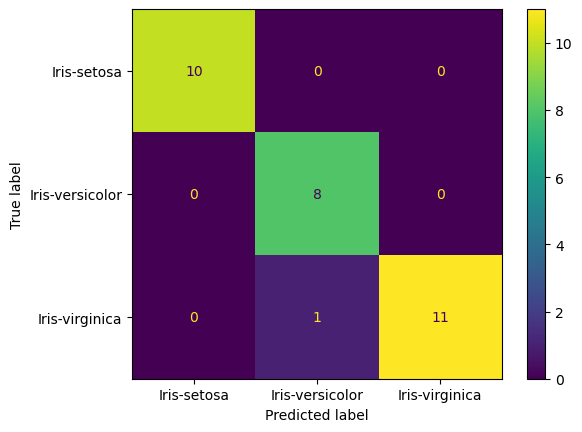

In [91]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
knnresult= confusion_matrix(y_predict_knn,y_test)
labels= ['Iris-setosa','Iris-versicolor','Iris-virginica']
cmd= ConfusionMatrixDisplay(knnresult,display_labels= labels)
cmd.plot()

In [ ]:
#Considering the SVC algorith for creating the model and checking the accuracy

In [105]:
from sklearn.svm import SVC
svc_cl= SVC().fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
y_predict_svc= svc_cl.predict(x_test)

In [107]:
accuracy_score_svc= accuracy_score(y_predict_svc,y_test)
accuracy_score_svc

0.9666666666666667

In [108]:
cl_report_svc= classification_report(y_predict_svc,y_test)
print(cl_report_svc)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



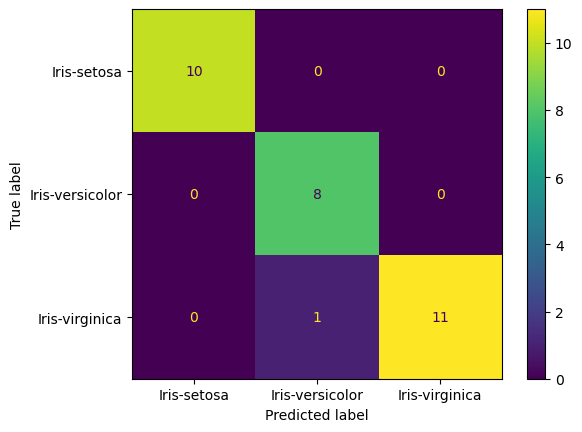

In [109]:
svcresult= confusion_matrix(y_predict_svc,y_test)
labels= ['Iris-setosa','Iris-versicolor','Iris-virginica']
cmd= ConfusionMatrixDisplay(svcresult,display_labels= labels)
cmd.plot()

In [ ]:
#Considering the DecsionTree classifier alogorithm for creating the model and checking the accuracy

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dt_cl= DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(x_train,y_train)

In [119]:
y_predict_dt= dt_cl.predict(x_test)

In [121]:
accuracy_score_dt= accuracy_score(y_predict_dt,y_test)
accuracy_score_dt

1.0

In [122]:
cl_report_dt= classification_report(y_predict_dt,y_test)
print(cl_report_dt)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



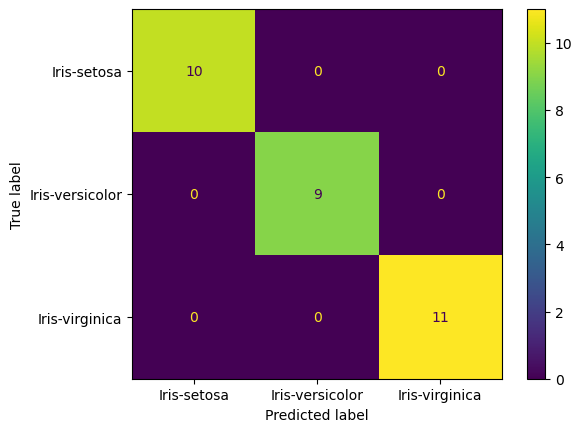

In [123]:
dtresult= confusion_matrix(y_predict_dt,y_test)
labels= ['Iris-setosa','Iris-versicolor','Iris-virginica']
cmd= ConfusionMatrixDisplay(dtresult,display_labels= labels)
cmd.plot()

In [ ]:
dt_cl2= DecisionTreeClassifier(criterion='gini', max_depth=3).fit(x_train,y_train)

In [124]:
y_predict_dt2= dt_cl.predict(x_test)

In [125]:
accuracy_score_dt2= accuracy_score(y_predict_dt2,y_test)
accuracy_score_dt2

1.0

In [ ]:
#Considering the RandomForest alogorithm for creating the model and checking the accuracy

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
cl_rf= RandomForestClassifier(random_state=42).fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [132]:
y_predict_rf= cl_rf.predict(x_test)

In [133]:
accuracy_score_rf= accuracy_score(y_predict_rf,y_test)
accuracy_score_rf

1.0

In [134]:
cl_report_rf= classification_report(y_predict_rf,y_test)
print(cl_report_rf)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



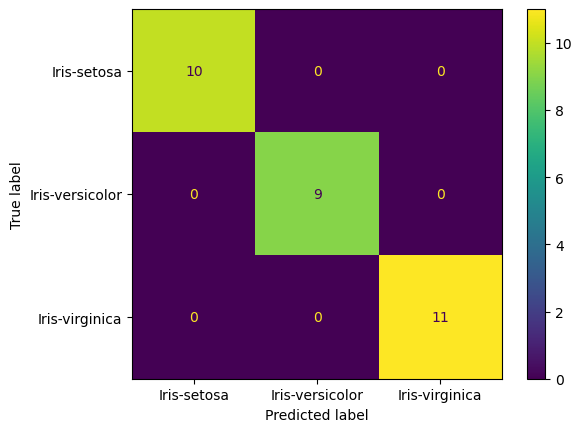

In [135]:
rfresult= confusion_matrix(y_predict_rf,y_test)
labels= ['Iris-setosa','Iris-versicolor','Iris-virginica']
cmd= ConfusionMatrixDisplay(rfresult,display_labels= labels)
cmd.plot()

# The accuracy given by the classification model using DecisionTree and RandomForest algorithms gave the maximum accuracy.
# Hence the above models may be choosen for getting best result.
# However an accuracy score of 1 is not usually obtained.It might be because of the small sample size